             0             1         2         3         4         5  \
0     1.000000  4.485700e-01  0.434754  0.467578  0.453676  0.445895   
1     0.448570  1.000000e+00  0.448574  0.434756  0.467579  0.453681   
2     0.434754  4.485740e-01  1.000000  0.448575  0.434764  0.467579   
3     0.467578  4.347560e-01  0.448575  1.000000  0.448574  0.434756   
4     0.453676  4.675790e-01  0.434764  0.448574  1.000000  0.448574   
...        ...           ...       ...       ...       ...       ...   
3217  0.000005  4.468280e-03  0.000003  0.439023  0.444455  0.450220   
3218  0.000016  1.116220e-05  0.004487  0.000011  0.439023  0.444469   
3219  0.000018  4.023710e-07  0.000001  0.004466  0.000010  0.438962   
3220  0.000004  1.932330e-06  0.000012  0.000013  0.004468  0.000001   
3221  0.000016  1.180760e-05  0.000014  0.000001  0.000012  0.004495   

             6         7         8         9  ...      3212      3213  \
0     0.448927  0.447964  0.447949  0.448444  ...  0.450203  0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

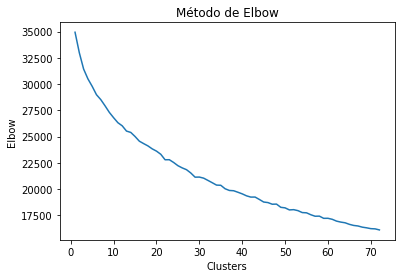

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


                  0                    1    2
0    Actinobacteria    Bifidobacteriales   76
1    Actinobacteria        Micrococcales   92
2    Actinobacteria     Streptomycetales   79
3    Actinobacteria    Micromonosporales   10
4    Actinobacteria    Pseudonocardiales   26
..              ...                  ...  ...
67    Thermotogales       Thermotogaceae   20
68    Thiotrichales  Piscirickettsiaceae   24
69    Thiotrichales      Francisellaceae   61
70      Vibrionales         Vibrionaceae  121
71  Xanthomonadales     Xanthomonadaceae  128

[72 rows x 3 columns]


In [5]:
#José Ivan Reyes Zacapala
#IA

#Importamos las librerias que emplearemos
import numpy as np
import pandas as pd
import matplotlib.pyplot as mtp
from sklearn.cluster import KMeans
import plotly.graph_objects as graph

#Creamos las variables que usaremos
ListaA=range(3221)
ListaA=list(ListaA)
ListaB=range(2721)
lista=list(ListaB)

#Leemos los archivos y almacenamos los dataframe
arch1=pd.read_csv('sims_All_Genomes_13V_0_536.txt',engine='python',header=None,names=ListaA)
arch2=pd.read_csv('sims_All_Genomes_13V_500_800.txt',engine='python',header=None,names=lista)
arch3=pd.read_csv('sims_All_Genomes_13V_800_1300.txt',engine='python',header=None,names=lista)
arch4=pd.read_csv('sims_All_Genomes_13V_1300_2000.txt',engine='python',header=None,names=lista)
arch5=pd.read_csv('sims_All_Genomes_13V_2000_2350.txt',engine='python',header=None,names=lista)
arch6=pd.read_csv('sims_All_Genomes_13V_2350_3222.txt',engine='python',header=None,names=lista)

#Borramos datos repetidos
arch1=arch1.drop(range(500,536))
arch2=arch2.drop(range(300,323))
arch3=arch3.drop(range(500,509))
arch4=arch4.drop(range(700,740))
arch5=arch5.drop(range(350,395))

#Integramos las variables donde almacenamos los dataframe
concat=pd.concat([arch1,arch2,arch3,arch4,arch5,arch6])


#Creamos un vector
Vector1=[]
Vector1.append(None)
concat= concat.append(Vector1,ignore_index=True)
concat['3221']=np.nan

#Creamos un bucle que trabajara la matriz diagonalmente
for i in range(0,3222):
  concat.iat[i,3221-i]=1


#Invertimos la matriz
matrizDiagonal=concat.copy()
for i in range(3222):
  for j in range(3222):
    matrizDiagonal.iat[i,j]=concat.iat[i,3221-j]
    
#Transponemos la matriz
matrizDiagonalTranspuesta=matrizDiagonal.transpose()
matrizDiagonal_copy=matrizDiagonal.copy()
for i in range(0,3222):
  for j in range(0,i):
    matrizDiagonal_copy.iat[i,j] = matrizDiagonalTranspuesta.iat[i,j]
    
#Imprimimos la matriz  
print(matrizDiagonal_copy)

#Aplicamos normalizacion a la matriz para que los datos tengan el mismo rango de valores
Normatriz=(matrizDiagonal_copy-matrizDiagonal_copy.min())/(matrizDiagonal_copy.max()-matrizDiagonal_copy.min())

#Buscar la cantidad de cluster empleando el método de Elbow
Elbow=[]
for i in range(1,73):
  kmeans=KMeans(n_clusters=i, max_iter=200)
  kmeans.fit(Normatriz)
  Elbow.append(kmeans.inertia_)
  
#Procedemos a graficar los datos
mtp.plot(range(1,73),Elbow)
mtp.title('Método de Elbow')
mtp.xlabel('Clusters')
mtp.ylabel('Elbow')
mtp.show()

#EL cluster 13 tiene una desviacion bastante notable con respecto a los cluster aledaños por lo que lo elegimos
clustering= KMeans(n_clusters=13, max_iter=200)
clustering.fit(Normatriz)

#Añadimos la clasificacon de los cluster
matrizDiagonal_copy['Clusters']=clustering.labels_
matrizDiagonal_copy.head(3222)

#Leemos el archivo de familias las familias
familias = pd.read_csv('groupOrderFamilySlop.txt', sep=',',names=(0,1,2))
print(familias)

#Creamos las variables para el diagrama de Sankey que emplearemos
source = pd.DataFrame(data = np.arange(0,13))
label = pd.DataFrame(data = familias[1])
value = pd.DataFrame(data = familias[2])
k_means = pd.DataFrame(data = np.zeros(13))
clustersR=pd.DataFrame(data=np.arange(0,3222))

#Creamos el diagrama
indice = 0
for i in range(13):
  for n in range(familias.iat[i,2]):
    clustersR.iat[indice,0] = familias.iat[i,1]
    indice = indice + 1
    contador = 0
for i in range(3222):
  num = clustersR.iat[i,0]
  num_ant = clustersR.iat[i-1,0]
  if(num != num_ant):
    num_clasif = matrizDiagonal_copy.at[i,'Clusters']
    k_means.at[contador] = num_clasif
    contador = contador + 1
k_means = pd.DataFrame(data=k_means)
for i in range(22):
  k_means.iat[i,0] = k_means.iat[i,0] + 13
  
node = dict(label = label[1], pad = 8, thickness=15)
link = dict(source = source[0], target = k_means[0], value = value[2])
diagrama = graph.Figure(graph.Sankey( node=node, link=link))
diagrama.update_layout(height = 1200,  width = 1200, font = dict(size=15,color='black'), title = 'Gráfica de las bacterias', font_size=12, paper_bgcolor='#fcfff0')
diagrama.show()